In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [3]:
df = pd.read_csv("XRP-USD.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-19,0.190924,0.191168,0.186534,0.186790,0.186790,1.097388e+09
1,2020-06-20,0.186790,0.189806,0.186086,0.188500,0.188500,9.666909e+08
2,2020-06-21,0.188468,0.189103,0.185501,0.185610,0.185610,8.936413e+08
3,2020-06-22,0.185665,0.190080,0.185594,0.189272,0.189272,1.209279e+09
4,2020-06-23,0.189295,0.189973,0.187062,0.188680,0.188680,1.093605e+09
...,...,...,...,...,...,...,...
361,2021-06-15,0.887069,0.902253,0.860290,0.889800,0.889800,3.585821e+09
362,2021-06-16,0.866854,0.873375,0.827554,0.831908,0.831908,2.916163e+09
363,2021-06-17,0.831733,0.861429,0.825875,0.841438,0.841438,2.684673e+09
364,2021-06-18,0.842324,0.844920,0.774985,0.797648,0.797648,2.509640e+09


In [4]:
forecast_col = 'Close'
forecast_out = 5
test_size = 0.2

In [6]:
import matplotlib.pyplot as plt
from prophet import Prophet

data = pd.read_csv("XRP-USD.csv")
data.head()

Importing plotly failed. Interactive plots will not work.


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-19,0.190924,0.191168,0.186534,0.186790,0.186790,1.097388e+09
1,2020-06-20,0.186790,0.189806,0.186086,0.188500,0.188500,9.666909e+08
2,2020-06-21,0.188468,0.189103,0.185501,0.185610,0.185610,8.936413e+08
3,2020-06-22,0.185665,0.190080,0.185594,0.189272,0.189272,1.209279e+09
4,2020-06-23,0.189295,0.189973,0.187062,0.188680,0.188680,1.093605e+09


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data_sort = data.sort_values('Date')
data_sort

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-19,0.190924,0.191168,0.186534,0.186790,0.186790,1.097388e+09
1,2020-06-20,0.186790,0.189806,0.186086,0.188500,0.188500,9.666909e+08
2,2020-06-21,0.188468,0.189103,0.185501,0.185610,0.185610,8.936413e+08
3,2020-06-22,0.185665,0.190080,0.185594,0.189272,0.189272,1.209279e+09
4,2020-06-23,0.189295,0.189973,0.187062,0.188680,0.188680,1.093605e+09
...,...,...,...,...,...,...,...
361,2021-06-15,0.887069,0.902253,0.860290,0.889800,0.889800,3.585821e+09
362,2021-06-16,0.866854,0.873375,0.827554,0.831908,0.831908,2.916163e+09
363,2021-06-17,0.831733,0.861429,0.825875,0.841438,0.841438,2.684673e+09
364,2021-06-18,0.842324,0.844920,0.774985,0.797648,0.797648,2.509640e+09


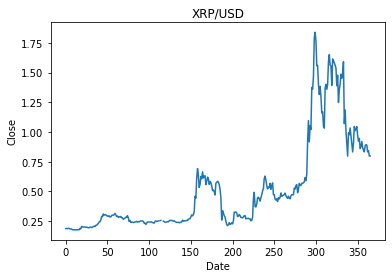

In [8]:
close = data_sort['Close']
ax = close.plot(title='XRP/USD')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [9]:
data_sort["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data_sort = data_sort[["Date", "Close"]]

In [10]:
data_sort = data_sort.rename(columns={"Date" : "ds", "Close" : "y" })

In [11]:
data_sort

,ds,y
0,2020-06-19,0.186790
1,2020-06-20,0.188500
2,2020-06-21,0.185610
3,2020-06-22,0.189272
4,2020-06-23,0.188680
...,...,...
361,2021-06-15,0.889800
362,2021-06-16,0.831908
363,2021-06-17,0.841438
364,2021-06-18,0.797648


In [12]:
model = Prophet()
model.fit(data_sort)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
726,2022-06-15,3.394214,2.953050,3.820340
727,2022-06-16,3.401261,2.909219,3.833569
728,2022-06-17,3.400474,2.928455,3.872598
729,2022-06-18,3.411598,2.932747,3.827003
730,2022-06-19,3.418277,2.942169,3.868045


In [13]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-19,0.161733,-0.124721,0.422843,0.161733,0.161733,-0.010134,-0.010134,-0.010134,-0.010134,-0.010134,-0.010134,0.0,0.0,0.0,0.151599
1,2020-06-20,0.162950,-0.124143,0.423216,0.162950,0.162950,-0.004888,-0.004888,-0.004888,-0.004888,-0.004888,-0.004888,0.0,0.0,0.0,0.158062
2,2020-06-21,0.164168,-0.115861,0.472182,0.164168,0.164168,-0.004087,-0.004087,-0.004087,-0.004087,-0.004087,-0.004087,0.0,0.0,0.0,0.160080
3,2020-06-22,0.165385,-0.109749,0.455105,0.165385,0.165385,0.011659,0.011659,0.011659,0.011659,0.011659,0.011659,0.0,0.0,0.0,0.177043
4,2020-06-23,0.166602,-0.104357,0.466800,0.166602,0.166602,0.015558,0.015558,0.015558,0.015558,0.015558,0.015558,0.0,0.0,0.0,0.182160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2022-06-15,3.398852,2.953050,3.820340,3.027717,3.739569,-0.004638,-0.004638,-0.004638,-0.004638,-0.004638,-0.004638,0.0,0.0,0.0,3.394214
727,2022-06-16,3.404730,2.909219,3.833569,3.032182,3.747039,-0.003469,-0.003469,-0.003469,-0.003469,-0.003469,-0.003469,0.0,0.0,0.0,3.401261
728,2022-06-17,3.410608,2.928455,3.872598,3.036356,3.754111,-0.010134,-0.010134,-0.010134,-0.010134,-0.010134,-0.010134,0.0,0.0,0.0,3.400474
729,2022-06-18,3.416486,2.932747,3.827003,3.039176,3.761329,-0.004888,-0.004888,-0.004888,-0.004888,-0.004888,-0.004888,0.0,0.0,0.0,3.411598


In [16]:
forcast.loc[(forcast['ds'] == '2021-06-15' )]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
361,2021-06-15,1.253339,0.966891,1.545198,1.253339,1.253339,0.015558,0.015558,0.015558,0.015558,0.015558,0.015558,0.0,0.0,0.0,1.268897


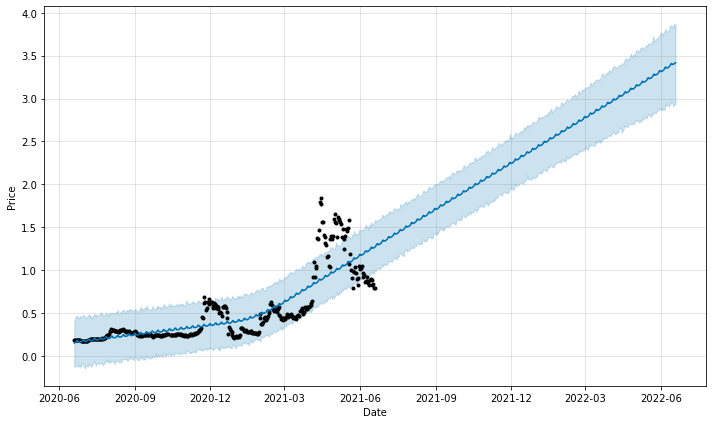

In [17]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")